In [1]:
import seaborn
import re
import pandas as pd
import csv
import numpy as np

In [2]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
stopwords = set(stopwords.words('english'))

In [6]:
# load data from csv
joke_scp_df = pd.read_csv('scpjokes.csv', header=0, delimiter=',', quoting=csv.QUOTE_ALL, encoding='utf-8', index_col=False, usecols=['code', 'title', 'text', 'link', 'rating'])

joke_scp_df.head # quick check - note excel limits will mean opening in excel will cause issues (cells running into others etc)

<bound method NDFrame.head of                                      code  \
0     CODENAME: Cimmerian/kaktus Proposal   
1        CODENAME: Daveyoufool's Proposal   
2        CODENAME: Dr. Palanez's Proposal   
3     CODENAME: Another djkaktus Proposal   
4    CODENAME: Henzoid-Crocket's Proposal   
..                                    ...   
327                                   NaN   
328                                   NaN   
329                                   NaN   
330                                   NaN   
331                             Joke SCPs   

                                      title  \
0                         ""The Broke God""   
1               ""KEEP CALM AND APOLLY ON""   
2                          ""The Question""   
3                  ""RUMBLY IN ITS TUMBLY""   
4                    ""When Day Breaks Up""   
..                                      ...   
327           "Standard Form For Downvotes"   
328  "The Big List of Overdone SCP Cliches"   
329   

In [7]:
def quick_clean(text):
  text = text.lower()
  clean_text = re.sub('[^a-zA-Z ]', '', text)
  return clean_text

In [8]:
def remove_stopwords(text):
  return " ".join([i for i in text.split() if i not in stopwords])

In [9]:
def pos_tag(text):
  return nltk.pos_tag(text.split())

In [10]:
def create_wordcloud(text):
  wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [11]:
def get_most_common(text):
  text = text.split()
  word_counts = {}
  for i in text:
    word_counts[i] = text.count(i)
  return sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:20]

In [12]:
def plot_most_common(text, label='Word', clr="rocket"):
  bar = seaborn.barplot([i[1] for i in text], [i[0] for i in text], orient= 'h', palette=clr)
  seaborn.despine(left=True, bottom=True)
  bar.set_xlabel('Frequency')
  bar.set_ylabel(label)

## Title analysis
Initial look shows very little interesting info from the titles, small dataset of short titles with basically no patterns

In [36]:
# extracting and preprocessing title text:
titles = joke_scp_df['title'].apply(lambda x: quick_clean(x))

In [37]:
# removing access denied from titles cleaned info
titles_nostopwords = [remove_stopwords(i) for i in titles]
titles_single_str = " ".join(titles)
titles_nostopwords_single_str = " ".join(titles_nostopwords)
titles_pos_tagged = pos_tag(titles_single_str)

In [38]:
# getting some bits of data for further use
title_nouns_as_str = " ".join([i[0] for i in titles_pos_tagged if i[1]=='NN'])
title_adjectives_as_str = " ".join([i[0] for i in titles_pos_tagged if i[1]=='JJ' and i[0]!="scp"]) # scp misclassified as adjective, removing it manually
title_verbs_as_str = " ".join([i[0] for i in titles_pos_tagged if i[1]=='VB'])

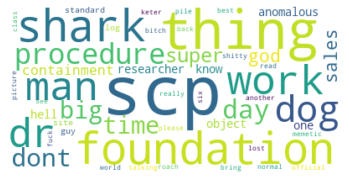

In [21]:
create_wordcloud(titles_nostopwords_single_str) # why is scp foundation in it so much and can this be removed?

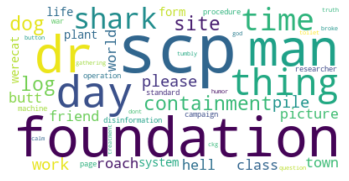

In [22]:
create_wordcloud(title_nouns_as_str)

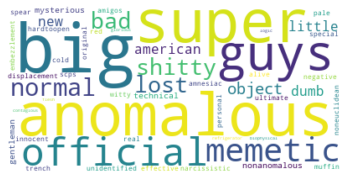

In [23]:
create_wordcloud(title_adjectives_as_str)

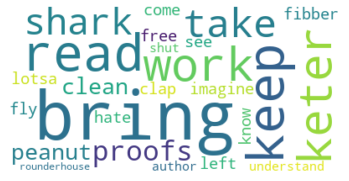

In [24]:
create_wordcloud(title_verbs_as_str)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


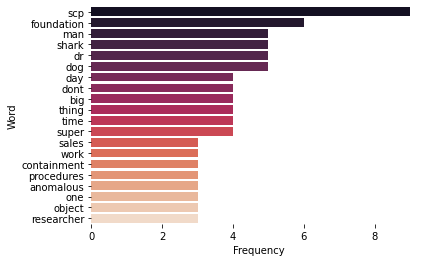

In [25]:
plot_most_common(get_most_common(titles_nostopwords_single_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


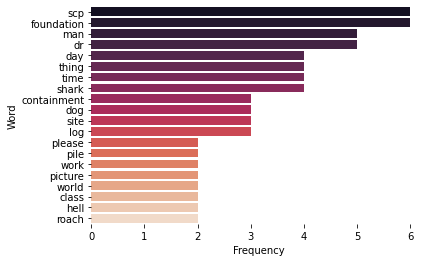

In [26]:
plot_most_common(get_most_common(title_nouns_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


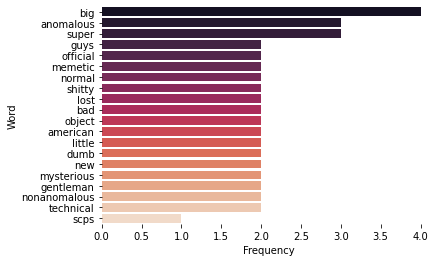

In [27]:
plot_most_common(get_most_common(title_adjectives_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


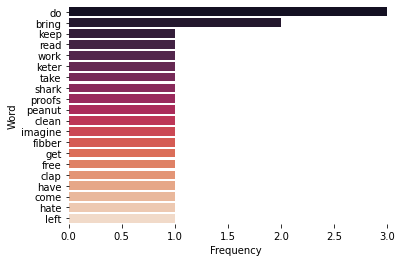

In [28]:
plot_most_common(get_most_common(title_verbs_as_str))

In [44]:
# not much do be gleaned here, a quick check of how many titles contain scp or scp foundation
in_titles_scp_count = len([i for i in titles_nostopwords_single_str.split() if i=="scp"])
contains_scp_count = len([i for i in titles if 'scp' in i.lower().split()])
print('Number of instances of \'SCP\' in titles: {} in {} different titles'.format(in_titles_scp_count, contains_scp_count))

in_titles_foundation_count = len([i for i in titles_nostopwords_single_str.split() if i=="foundation"])
contains_foundation_count = len([i for i in titles if 'foundation' in i.lower().split()])
print('Number of instances of \'foundation\' in titles: {} in {} different titles'.format(in_titles_foundation_count, contains_foundation_count))


Number of instances of 'SCP' in titles: 9 in 9 different titles
Number of instances of 'foundation' in titles: 6 in 6 different titles


## Text Analysis

In [45]:
joke_scp_df.text = joke_scp_df.text.astype(str)
text = joke_scp_df['text'].apply(lambda x: quick_clean(x))
text_nostopwords = [remove_stopwords(i) for i in text]
text_single_str = " ".join(text_nostopwords)
text_nostopwords_single_str = " ".join(text_nostopwords)
text_pos_tagged = pos_tag(text_single_str)

In [46]:
text_nouns_as_str = " ".join([i[0] for i in text_pos_tagged if i[1]=='NN'])
text_adjectives_as_str = " ".join([i[0] for i in text_pos_tagged if i[1]=='JJ'])
text_verbs_as_str = " ".join([i[0] for i in text_pos_tagged if i[1]=='VB'])

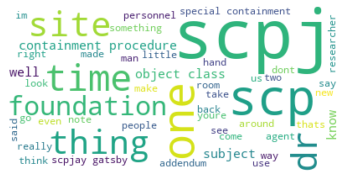

In [47]:
create_wordcloud(text_nostopwords_single_str)

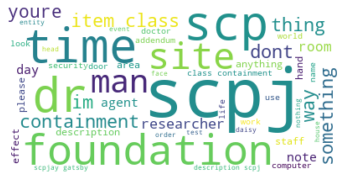

In [48]:
create_wordcloud(text_nouns_as_str)

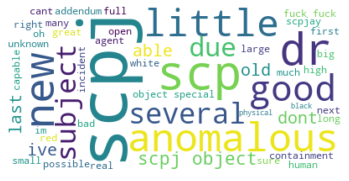

In [49]:
create_wordcloud(text_adjectives_as_str)

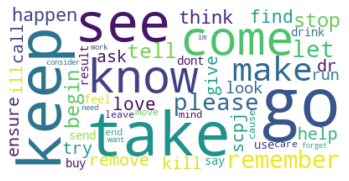

In [50]:
create_wordcloud(text_verbs_as_str)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


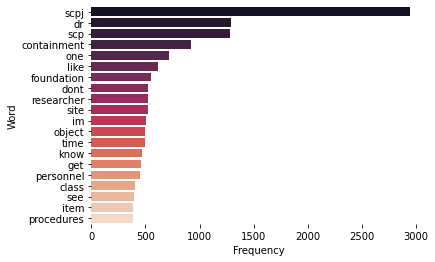

In [51]:
plot_most_common(get_most_common(text_nostopwords_single_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


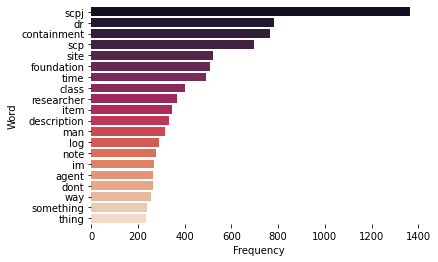

In [52]:
plot_most_common(get_most_common(text_nouns_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


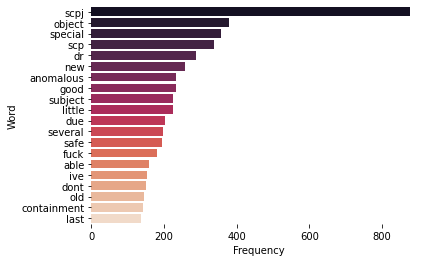

In [53]:
plot_most_common(get_most_common(text_adjectives_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


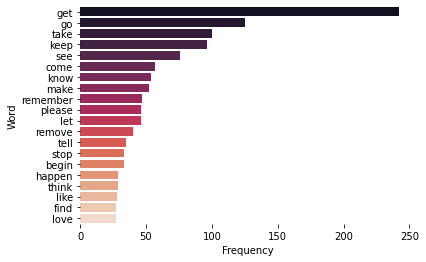

In [54]:
plot_most_common(get_most_common(text_verbs_as_str))

## Ratings


### NaN

In [56]:
no_rating_articles = [i for i in list(joke_scp_df['rating']) if np.isnan(i)]
no_rating_num = len(no_rating_articles)
print('Number of pages with no rating: {}'.format(no_rating_num))
print('Percentage of pages with no rating: {}%'.format(round(no_rating_num / len(joke_scp_df) * 100, 1)))

Number of pages with no rating: 2
Percentage of pages with no rating: 0.6%
